In [281]:
!pip install Keras
!pip install keras-layer-normalization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. Import libraries

In [282]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense
import numpy as np
np.random.seed(5)
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as pyplot
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [283]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Read and store data

In [284]:
data = pd.read_csv("/content/drive/MyDrive/UPM/Internship/Clinical_data_and_RNA_total_Features_PFS.csv")
data

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,962.0,-16.406250,12.164384,0.766909,...,33.26816,30.04056,30.36292,30.98129,32.38442,28.01561,31.24379,33.81903,33.22469,31.23383
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,67.0,0.0,0.0,2.0,254.0,-40.000000,5.490411,0.773269,...,31.53633,29.94062,30.80829,30.74475,32.09470,26.32526,32.70057,33.67262,33.10198,32.44643
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,800.0,-89.436620,61.906849,1.782859,...,30.74474,31.95812,30.73898,30.15898,31.69473,26.33098,32.68330,33.96047,32.97135,32.20607
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,60.0,0.0,0.0,3.0,790.0,11.787072,1.249315,5.890573,...,31.63196,30.71732,31.09654,30.25757,31.90774,27.53819,32.64194,34.54254,33.24885,32.78278
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,76.0,0.0,0.0,2.0,1241.0,0.000000,5.654795,1.374775,...,31.75620,30.75149,30.55896,30.17101,31.01545,21.45312,32.86620,34.24375,34.86720,32.73361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,176,RCC_73_T_SCR,77.0,0.0,0.0,1.0,42.0,11.000000,1.906849,1.374775,...,31.62442,30.78532,30.86517,30.92600,31.53239,23.65585,32.42073,34.41045,33.21697,32.22166
177,177,RCC_90_T_SCR,54.0,0.0,0.0,1.0,42.0,57.000000,1.183562,1.374775,...,31.40147,31.50200,29.96535,30.21446,31.49627,28.04168,32.19568,32.69615,32.18970,32.59554
178,178,RCC_93_T_SCR,64.0,0.0,0.0,1.0,42.0,-43.000000,16.438356,1.374775,...,31.21094,30.91066,31.35764,30.99788,31.45772,23.65585,32.36832,35.02409,34.26388,32.82148
179,179,RCC_96_T_SCR,75.0,0.0,0.0,1.0,42.0,12.000000,1.216438,1.374775,...,31.12324,28.76312,31.48891,30.27351,32.88316,23.65585,31.76924,34.07224,34.35116,31.98965


In [285]:
Y = data.PFS
Y

0      12.164384
1       5.490411
2      61.906849
3       1.249315
4       5.654795
         ...    
176     1.906849
177     1.183562
178    16.438356
179     1.216438
180     1.347945
Name: PFS, Length: 181, dtype: float64

In [286]:
data = data.iloc[:,28:43921] 
data

,5S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2MP1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,21.038652,35.199603,30.187983,22.999432,33.643965,37.130851,22.705126,22.869853,21.076515,21.271282,...,33.26816,30.04056,30.36292,30.98129,32.38442,28.01561,31.24379,33.81903,33.22469,31.23383
1,21.038652,38.183943,30.483638,25.581769,28.866645,37.945043,27.797609,24.142100,21.076515,21.271282,...,31.53633,29.94062,30.80829,30.74475,32.09470,26.32526,32.70057,33.67262,33.10198,32.44643
2,21.038652,37.141292,30.092851,26.933385,26.684228,36.851946,22.705126,30.406352,21.076515,21.271282,...,30.74474,31.95812,30.73898,30.15898,31.69473,26.33098,32.68330,33.96047,32.97135,32.20607
3,21.038652,36.447015,30.975010,26.683128,32.521495,38.453517,26.337846,28.229357,21.076515,21.271282,...,31.63196,30.71732,31.09654,30.25757,31.90774,27.53819,32.64194,34.54254,33.24885,32.78278
4,21.038652,37.623923,26.915750,22.999432,23.219176,38.931987,22.705126,22.869853,21.076515,21.271282,...,31.75620,30.75149,30.55896,30.17101,31.01545,21.45312,32.86620,34.24375,34.86720,32.73361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,21.038043,36.338729,30.954407,27.310879,26.161567,38.376185,25.971821,24.438322,21.076088,21.056491,...,31.62442,30.78532,30.86517,30.92600,31.53239,23.65585,32.42073,34.41045,33.21697,32.22166
177,21.038043,38.248915,33.110149,26.793199,26.161567,36.537388,26.388265,24.438322,21.076088,21.056491,...,31.40147,31.50200,29.96535,30.21446,31.49627,28.04168,32.19568,32.69615,32.18970,32.59554
178,21.038043,35.884812,32.880283,25.659842,31.822942,38.265866,26.504307,24.438322,21.076088,21.056491,...,31.21094,30.91066,31.35764,30.99788,31.45772,23.65585,32.36832,35.02409,34.26388,32.82148
179,21.038043,35.283776,30.658715,27.533890,32.930512,36.882090,26.303147,24.438322,21.076088,21.056491,...,31.12324,28.76312,31.48891,30.27351,32.88316,23.65585,31.76924,34.07224,34.35116,31.98965


# 4. Data split into Train and Test

In [287]:
data = data.iloc[:,0:-1].apply(lambda x: (x-x.min())/ (x.max() - x.min()), axis=0)

In [288]:
data

,5S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2MP1,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
0,0.006914,0.192547,0.678662,0.381792,0.845335,0.575510,0.406032,0.236690,1.00000,0.089018,...,0.572566,0.929002,0.707656,0.519926,0.818608,0.691080,0.768420,0.341273,0.319148,0.379277
1,0.006914,0.695755,0.697819,0.571002,0.528869,0.756444,0.831889,0.325159,1.00000,0.089018,...,0.579149,0.747821,0.698606,0.608854,0.774338,0.605338,0.613249,0.718327,0.277535,0.343460
2,0.006914,0.519947,0.672498,0.670036,0.384299,0.513530,0.406032,0.760759,1.00000,0.089018,...,0.505492,0.665007,0.881304,0.595015,0.664706,0.486968,0.613774,0.713857,0.359348,0.305331
3,0.006914,0.402881,0.729657,0.651699,0.770979,0.869440,0.709817,0.609376,1.00000,0.089018,...,0.585805,0.757826,0.768942,0.666409,0.683158,0.550008,0.724594,0.703152,0.524786,0.386329
4,0.006914,0.601326,0.466640,0.381792,0.154762,0.975769,0.406032,0.236690,1.00000,0.089018,...,1.000000,0.770824,0.772036,0.559070,0.666957,0.285936,0.165994,0.761196,0.439863,0.858704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.006842,0.384622,0.728322,0.697695,0.349676,0.852255,0.679208,0.345757,0.99572,0.038915,...,0.610809,0.757037,0.775099,0.620211,0.808260,0.438924,0.368201,0.645897,0.487243,0.377024
177,0.006842,0.706710,0.868002,0.659764,0.349676,0.443627,0.714033,0.345757,0.99572,0.038915,...,0.324568,0.733713,0.840000,0.440543,0.675089,0.428234,0.770813,0.587648,0.000000,0.077178
178,0.006842,0.308084,0.853108,0.576722,0.724704,0.827739,0.723737,0.345757,0.99572,0.038915,...,0.796405,0.713780,0.786450,0.718543,0.821713,0.416825,0.368201,0.632332,0.661653,0.682603
179,0.006842,0.206740,0.709163,0.714035,0.798074,0.520229,0.706915,0.345757,0.99572,0.038915,...,0.388617,0.704605,0.591975,0.744754,0.686141,0.838682,0.368201,0.477274,0.391116,0.708079


In [289]:
label =[]
for i in Y:
  if i<3:
    label.append(0)
  elif i<6:
    label.append(1)
  else:
    label.append(2)
X_train, X_test, Y_train, Y_test = train_test_split(data, label,test_size=0.2, random_state=125, stratify=label)

In [290]:
print(X_train)

      5S_rRNA       7SK      A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1  \
51   0.000000  0.220467  0.783331  0.767953  0.782478  0.351309  0.293341   
85   0.000000  0.246825  0.769959  0.745841  0.855338  0.524203  0.293341   
117  0.005436  0.591356  0.759536  0.764540  0.556191  0.675764  0.758474   
25   0.006914  0.103778  0.802449  0.381792  0.782545  0.691762  0.406032   
170  0.006842  0.434213  0.723493  0.318150  0.706788  0.455814  0.234578   
..        ...       ...       ...       ...       ...       ...       ...   
76   0.005436  0.603791  0.787534  0.717969  0.418610  0.940733  0.615839   
1    0.006914  0.695755  0.697819  0.571002  0.528869  0.756444  0.831889   
9    0.006914  0.189096  0.696929  0.678934  0.720749  0.510668  0.812157   
79   0.005436  0.251549  0.986708  0.823952  0.377582  0.463116  0.300196   
112  0.005436  0.366111  0.734299  0.618535  0.646724  0.642614  0.758274   

        A2ML1  A2ML1-AS1     A2MP1  ...      ZW10    ZWILCH     ZWINT  \
51

In [291]:
np.savetxt("/content/drive/MyDrive/UPM/Internship/input_data_binary_43.csv", X_train, delimiter=',')

# 5. Autoencoder model creation

In [292]:
n_inputs=X_train.shape[1]
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs/1000)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs/10000)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs/1000
bottleneck = Dense(n_bottleneck)(e)

# define decoder, level 1
d = Dense(n_inputs/10000)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs/1000)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)

### 5.1. Loss function definition

In [293]:
model.compile(optimizer='adam', loss='mse')

# 6. Autoencoder model training

In [294]:
nits = 100 #1000-1500
tam_lote = 16

history = model.fit(X_train, X_train, epochs=nits, batch_size=tam_lote, shuffle=True, validation_data=(X_test,X_test), verbose=2)

Epoch 1/100
9/9 - 2s - loss: 0.1931 - val_loss: 0.1368 - 2s/epoch - 248ms/step
Epoch 2/100
9/9 - 0s - loss: 0.1372 - val_loss: 0.1618 - 405ms/epoch - 45ms/step
Epoch 3/100
9/9 - 0s - loss: 0.0899 - val_loss: 0.2168 - 405ms/epoch - 45ms/step
Epoch 4/100
9/9 - 0s - loss: 0.0582 - val_loss: 0.1699 - 484ms/epoch - 54ms/step
Epoch 5/100
9/9 - 1s - loss: 0.0456 - val_loss: 0.1201 - 515ms/epoch - 57ms/step
Epoch 6/100
9/9 - 1s - loss: 0.0364 - val_loss: 0.0844 - 511ms/epoch - 57ms/step
Epoch 7/100
9/9 - 1s - loss: 0.0321 - val_loss: 0.0746 - 516ms/epoch - 57ms/step
Epoch 8/100
9/9 - 0s - loss: 0.0314 - val_loss: 0.0705 - 497ms/epoch - 55ms/step
Epoch 9/100
9/9 - 1s - loss: 0.0305 - val_loss: 0.0664 - 504ms/epoch - 56ms/step
Epoch 10/100
9/9 - 0s - loss: 0.0306 - val_loss: 0.0705 - 499ms/epoch - 55ms/step
Epoch 11/100
9/9 - 1s - loss: 0.0314 - val_loss: 0.0718 - 512ms/epoch - 57ms/step
Epoch 12/100
9/9 - 1s - loss: 0.0303 - val_loss: 0.0663 - 610ms/epoch - 68ms/step
Epoch 13/100
9/9 - 1s - los

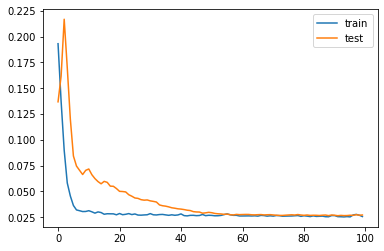

In [295]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# 7. Model validation

### 7.1 Generate prediction

In [296]:
X_pred = model.predict(X_test)

2/2 [==============================] - 0s 15ms/step


### 7.2. Mean squared error (MSE) calculation

In [297]:
MSE = np.mean(np.power(X_test-X_pred,2), axis=1)

In [298]:
Y_test2=np.array(Y_test, dtype=bool)


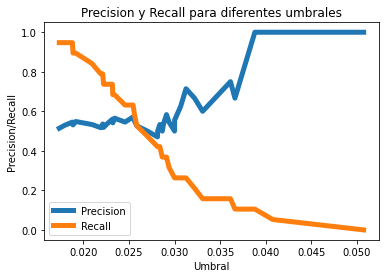

In [299]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
precision, recall, umbral = precision_recall_curve(Y_test2, MSE)

plt.plot(umbral, precision[1:], label="Precision",linewidth=5)
plt.plot(umbral, recall[1:], label="Recall",linewidth=5)
plt.title('Precision y Recall para diferentes umbrales')
plt.xlabel('Umbral')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [300]:
threshold = 0.035
Y_pred = [1 if e > threshold else 0 for e in MSE]

In [301]:
MSE

172    0.015578
50     0.036618
84     0.019152
68     0.033075
53     0.038800
147    0.028650
120    0.029393
65     0.025449
22     0.022215
143    0.029116
114    0.024567
136    0.018866
64     0.025861
81     0.040756
36     0.023221
155    0.030004
97     0.027018
37     0.028128
109    0.022644
127    0.023181
115    0.028797
67     0.029998
148    0.025620
126    0.036126
74     0.028387
146    0.021907
153    0.031251
124    0.032190
73     0.050729
95     0.028145
3      0.018796
16     0.022129
26     0.020931
35     0.017360
62     0.030665
130    0.023418
169    0.017957
dtype: float64

In [302]:
import collections
match = collections.Counter(Y_pred)[0]
print('Final accuracy on the testing dataset: ' + str(match/len(Y_pred)))

Final accuracy on the testing dataset: 0.8648648648648649


In [303]:
np.savetxt("/content/drive/MyDrive/UPM/Internship/output_data_binary_43.csv", X_train, delimiter=',')

# Save model

In [304]:
encoder = Model(inputs = visible, outputs = bottleneck)

In [305]:
encoder.save('/content/drive/MyDrive/UPM/Internship/encoder_binary_43.h5')

In [306]:
from keras import models    

In [307]:
encoder = models.load_model('/content/drive/MyDrive/UPM/Internship/encoder_binary_43.h5')

In [308]:
X_train_encode = encoder.predict(X_train)
X_test_encode = encoder.predict(X_test)

2/2 [==============================] - 0s 10ms/step


In [309]:
train = pd.DataFrame(X_train_encode)
train

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-0.271687,-0.167837,-0.115266,0.176883,0.038053,0.105551,-0.220474,-0.043395,0.236878,-0.038059,...,0.195691,-0.192625,-0.159936,-0.097735,0.018308,-0.045616,0.265278,-0.187434,-0.003859,0.200797
1,-0.187432,0.007941,-0.011556,0.166684,0.100907,0.074320,-0.081120,-0.046513,0.101504,-0.054619,...,0.121125,-0.100015,-0.035160,0.035365,0.031841,-0.022431,0.198292,-0.026513,-0.049670,0.192500
2,-0.101218,-0.046199,-0.001785,-0.322813,-0.449427,-0.650956,-0.335172,-0.557746,-0.448823,0.063493,...,0.082012,0.229229,0.316756,-0.087374,0.302842,0.275883,-0.386464,0.019678,0.599312,-0.537245
3,0.716653,-0.619780,-0.287574,-0.836925,-0.728762,-0.245293,-0.003394,0.284405,-0.061965,0.350969,...,-0.406593,0.200820,-0.233579,-0.617830,-0.228108,0.039143,-0.815942,-0.387183,0.391861,-0.968590
4,0.785705,-0.610863,-0.284763,-0.854761,-0.713687,-0.187901,0.070297,0.360393,-0.043188,0.367046,...,-0.459803,0.200796,-0.248358,-0.611237,-0.270497,0.023423,-0.839707,-0.372844,0.343957,-0.969868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.228495,-0.214654,-0.077179,-0.533576,-0.554171,-0.543140,-0.190143,-0.266953,-0.365707,0.165818,...,-0.117119,0.261192,0.156278,-0.255610,0.120204,0.201537,-0.583684,-0.088697,0.532921,-0.726703
140,0.983272,-0.627778,-0.303491,-0.939148,-0.719928,-0.039274,0.256114,0.565824,0.017393,0.433554,...,-0.613191,0.192112,-0.298041,-0.627082,-0.388331,-0.006946,-0.935949,-0.361226,0.249462,-1.017409
141,0.764080,-0.570239,-0.278016,-0.805896,-0.665093,-0.110322,0.122511,0.388334,-0.006015,0.366347,...,-0.466886,0.160718,-0.238389,-0.562841,-0.280572,0.023470,-0.794850,-0.339888,0.296289,-0.898897
142,0.268455,-0.246744,-0.155816,-0.485512,-0.504945,-0.204306,0.002564,-0.043296,-0.132686,0.246001,...,-0.215680,0.078105,0.076155,-0.232853,-0.000462,0.184355,-0.521238,-0.099312,0.394551,-0.598908


In [310]:
test = pd.DataFrame(X_test_encode)
test

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.661122,-0.504799,-0.246264,-0.773735,-0.671420,-0.204252,0.063635,0.246267,-0.085799,0.342165,...,-0.407627,0.178585,-0.144279,-0.504514,-0.194413,0.077662,-0.779246,-0.287076,0.370509,-0.893040
1,0.133681,-0.204387,-0.098080,-0.409614,-0.461132,-0.388412,-0.167335,-0.218303,-0.236669,0.151140,...,-0.077586,0.150028,0.112654,-0.215499,0.098934,0.176670,-0.438682,-0.096740,0.443813,-0.558740
2,-0.374972,-0.027690,-0.041644,0.357881,0.227490,0.189364,-0.180502,-0.044641,0.261432,-0.119964,...,0.257390,-0.222678,-0.136956,0.034969,0.033068,-0.085419,0.442185,-0.101177,-0.142259,0.423947
3,-0.412728,-0.160236,-0.106775,0.332906,0.159040,0.151340,-0.303596,-0.064160,0.315424,-0.112513,...,0.310152,-0.248624,-0.219445,-0.078120,0.033068,-0.101144,0.454513,-0.220829,-0.083038,0.382318
4,-0.282579,0.167344,0.061677,0.291292,0.223341,0.111078,-0.026530,-0.102181,0.068775,-0.103806,...,0.155866,-0.114138,0.058815,0.185107,0.078968,-0.003894,0.297197,0.095777,-0.111188,0.337278
5,-0.027826,-0.025826,0.001704,-0.262134,-0.335703,-0.459675,-0.201846,-0.375946,-0.334229,0.061471,...,0.023031,0.176717,0.237145,-0.059425,0.203644,0.203401,-0.316789,0.029074,0.428001,-0.415477
6,0.230602,-0.241613,-0.093951,-0.445228,-0.449052,-0.389556,-0.151977,-0.134777,-0.231427,0.143376,...,-0.110455,0.193340,0.045588,-0.266238,0.045459,0.120652,-0.464964,-0.132819,0.391596,-0.587383
7,-0.447779,-0.047021,-0.054905,0.412192,0.251791,0.202659,-0.234111,-0.067655,0.302282,-0.140340,...,0.311376,-0.258329,-0.163159,0.027330,0.046012,-0.097000,0.514044,-0.131271,-0.148540,0.483279
8,0.816616,-0.588095,-0.274598,-0.825287,-0.658326,-0.111960,0.131946,0.432277,-0.005235,0.362041,...,-0.485159,0.185129,-0.272416,-0.588445,-0.308627,-0.005891,-0.809976,-0.357256,0.268479,-0.914759
9,0.148999,-0.072876,-0.025848,-0.296770,-0.292926,-0.272167,-0.044242,-0.131794,-0.215695,0.101740,...,-0.097852,0.145404,0.121001,-0.099333,0.061778,0.125405,-0.340539,-0.002392,0.277864,-0.396267


In [311]:
data = pd.concat([train,test])
data

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-0.271687,-0.167837,-0.115266,0.176883,0.038053,0.105551,-0.220474,-0.043395,0.236878,-0.038059,...,0.195691,-0.192625,-0.159936,-0.097735,0.018308,-0.045616,0.265278,-0.187434,-0.003859,0.200797
1,-0.187432,0.007941,-0.011556,0.166684,0.100907,0.074320,-0.081120,-0.046513,0.101504,-0.054619,...,0.121125,-0.100015,-0.035160,0.035365,0.031841,-0.022431,0.198292,-0.026513,-0.049670,0.192500
2,-0.101218,-0.046199,-0.001785,-0.322813,-0.449427,-0.650956,-0.335172,-0.557746,-0.448823,0.063493,...,0.082012,0.229229,0.316756,-0.087374,0.302842,0.275883,-0.386464,0.019678,0.599312,-0.537245
3,0.716653,-0.619780,-0.287574,-0.836925,-0.728762,-0.245293,-0.003394,0.284405,-0.061965,0.350969,...,-0.406593,0.200820,-0.233579,-0.617830,-0.228108,0.039143,-0.815942,-0.387183,0.391861,-0.968590
4,0.785705,-0.610863,-0.284763,-0.854761,-0.713687,-0.187901,0.070297,0.360393,-0.043188,0.367046,...,-0.459803,0.200796,-0.248358,-0.611237,-0.270497,0.023423,-0.839707,-0.372844,0.343957,-0.969868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,0.750806,-0.554808,-0.240548,-0.804070,-0.654969,-0.228263,0.048911,0.321130,-0.084223,0.320945,...,-0.422113,0.232898,-0.227100,-0.570905,-0.244832,0.008766,-0.793690,-0.340299,0.318387,-0.920021
33,0.808704,-0.577178,-0.269371,-0.845243,-0.685772,-0.153873,0.120091,0.390487,-0.042348,0.367406,...,-0.483761,0.201109,-0.238000,-0.581353,-0.284505,0.019021,-0.838728,-0.342409,0.309060,-0.948807
34,-0.289151,-0.081645,-0.065241,0.243141,0.125365,0.128965,-0.179051,-0.040194,0.218734,-0.075108,...,0.204354,-0.181415,-0.131664,-0.024289,0.023728,-0.061283,0.319720,-0.125525,-0.070005,0.283779
35,-0.338423,-0.187371,-0.121061,0.258475,0.102488,0.141063,-0.272004,-0.034064,0.298851,-0.077332,...,0.257451,-0.228085,-0.218497,-0.108010,0.012591,-0.089214,0.372476,-0.227565,-0.056206,0.299379


In [312]:
for i in Y_test:
  Y_train.append(i)

In [313]:
len(Y_train)

181

In [314]:
data.insert(0,"Target", Y_train)
data

,Target,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,42
0,1,-0.271687,-0.167837,-0.115266,0.176883,0.038053,0.105551,-0.220474,-0.043395,0.236878,...,0.195691,-0.192625,-0.159936,-0.097735,0.018308,-0.045616,0.265278,-0.187434,-0.003859,0.200797
1,0,-0.187432,0.007941,-0.011556,0.166684,0.100907,0.074320,-0.081120,-0.046513,0.101504,...,0.121125,-0.100015,-0.035160,0.035365,0.031841,-0.022431,0.198292,-0.026513,-0.049670,0.192500
2,2,-0.101218,-0.046199,-0.001785,-0.322813,-0.449427,-0.650956,-0.335172,-0.557746,-0.448823,...,0.082012,0.229229,0.316756,-0.087374,0.302842,0.275883,-0.386464,0.019678,0.599312,-0.537245
3,0,0.716653,-0.619780,-0.287574,-0.836925,-0.728762,-0.245293,-0.003394,0.284405,-0.061965,...,-0.406593,0.200820,-0.233579,-0.617830,-0.228108,0.039143,-0.815942,-0.387183,0.391861,-0.968590
4,2,0.785705,-0.610863,-0.284763,-0.854761,-0.713687,-0.187901,0.070297,0.360393,-0.043188,...,-0.459803,0.200796,-0.248358,-0.611237,-0.270497,0.023423,-0.839707,-0.372844,0.343957,-0.969868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2,0.750806,-0.554808,-0.240548,-0.804070,-0.654969,-0.228263,0.048911,0.321130,-0.084223,...,-0.422113,0.232898,-0.227100,-0.570905,-0.244832,0.008766,-0.793690,-0.340299,0.318387,-0.920021
33,2,0.808704,-0.577178,-0.269371,-0.845243,-0.685772,-0.153873,0.120091,0.390487,-0.042348,...,-0.483761,0.201109,-0.238000,-0.581353,-0.284505,0.019021,-0.838728,-0.342409,0.309060,-0.948807
34,0,-0.289151,-0.081645,-0.065241,0.243141,0.125365,0.128965,-0.179051,-0.040194,0.218734,...,0.204354,-0.181415,-0.131664,-0.024289,0.023728,-0.061283,0.319720,-0.125525,-0.070005,0.283779
35,0,-0.338423,-0.187371,-0.121061,0.258475,0.102488,0.141063,-0.272004,-0.034064,0.298851,...,0.257451,-0.228085,-0.218497,-0.108010,0.012591,-0.089214,0.372476,-0.227565,-0.056206,0.299379


In [315]:
data

,Target,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,42
0,1,-0.271687,-0.167837,-0.115266,0.176883,0.038053,0.105551,-0.220474,-0.043395,0.236878,...,0.195691,-0.192625,-0.159936,-0.097735,0.018308,-0.045616,0.265278,-0.187434,-0.003859,0.200797
1,0,-0.187432,0.007941,-0.011556,0.166684,0.100907,0.074320,-0.081120,-0.046513,0.101504,...,0.121125,-0.100015,-0.035160,0.035365,0.031841,-0.022431,0.198292,-0.026513,-0.049670,0.192500
2,2,-0.101218,-0.046199,-0.001785,-0.322813,-0.449427,-0.650956,-0.335172,-0.557746,-0.448823,...,0.082012,0.229229,0.316756,-0.087374,0.302842,0.275883,-0.386464,0.019678,0.599312,-0.537245
3,0,0.716653,-0.619780,-0.287574,-0.836925,-0.728762,-0.245293,-0.003394,0.284405,-0.061965,...,-0.406593,0.200820,-0.233579,-0.617830,-0.228108,0.039143,-0.815942,-0.387183,0.391861,-0.968590
4,2,0.785705,-0.610863,-0.284763,-0.854761,-0.713687,-0.187901,0.070297,0.360393,-0.043188,...,-0.459803,0.200796,-0.248358,-0.611237,-0.270497,0.023423,-0.839707,-0.372844,0.343957,-0.969868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2,0.750806,-0.554808,-0.240548,-0.804070,-0.654969,-0.228263,0.048911,0.321130,-0.084223,...,-0.422113,0.232898,-0.227100,-0.570905,-0.244832,0.008766,-0.793690,-0.340299,0.318387,-0.920021
33,2,0.808704,-0.577178,-0.269371,-0.845243,-0.685772,-0.153873,0.120091,0.390487,-0.042348,...,-0.483761,0.201109,-0.238000,-0.581353,-0.284505,0.019021,-0.838728,-0.342409,0.309060,-0.948807
34,0,-0.289151,-0.081645,-0.065241,0.243141,0.125365,0.128965,-0.179051,-0.040194,0.218734,...,0.204354,-0.181415,-0.131664,-0.024289,0.023728,-0.061283,0.319720,-0.125525,-0.070005,0.283779
35,0,-0.338423,-0.187371,-0.121061,0.258475,0.102488,0.141063,-0.272004,-0.034064,0.298851,...,0.257451,-0.228085,-0.218497,-0.108010,0.012591,-0.089214,0.372476,-0.227565,-0.056206,0.299379


In [316]:
data.to_csv("/content/drive/MyDrive/UPM/Internship/encoded_data_binary_43.csv")